In [130]:
using DelimitedFiles

start_idx = 751
end_idx = 3000

3000

In [131]:
loaded_data = readdlm("data/original_extrapolation.txt")
original_data = Array{Float64}(loaded_data)
original_data = original_data[start_idx:end_idx, :]

2250×7 Matrix{Float64}:
 14.6317  96.6114   9.24194  141.068  -0.0   -0.0     74.3924
 15.2285  96.3166   8.93825  141.068  -0.0   -0.0     74.1262
 16.6184  96.0229   9.02819  141.068  -0.0   -0.0     73.8617
 18.7944  95.7302   9.13437  141.068  -0.0   -0.0     73.5978
 21.7461  95.4385   9.23901  141.068  -0.0   -0.0     73.3345
 25.459   95.1479   9.34213  141.068  -0.0   -0.0     73.0712
 29.915   94.8583   9.44376  141.068  -0.0   -0.0     72.806
 35.0924  94.5697   9.54392  141.068  -0.0   -0.0     72.5285
 40.9659  94.2822   9.64264  141.068  -0.0   -0.0     72.2628
 47.507   93.9958   9.73994  141.068  -0.0   -0.0     72.0089
  ⋮                                           ⋮       
 14.0276  93.3861  14.2667   135.276  -0.0  291.103   71.149
 14.2095  93.1041  14.6756   137.095  -0.0  252.238   70.8756
 14.3553  92.8233  14.5904   138.553  -0.0  180.182   70.6022
 14.4329  92.5435  14.0876   139.329  -0.0   79.9209  70.3308
 14.4406  92.2649  13.4196   139.406  -0.0   -0.0     7

In [164]:
loaded_data = readdlm("data/pinn_extrapolationSIN.txt")
pinn_data = Array{Float64}(loaded_data)
pinn_data = pinn_data[start_idx:end_idx, :]
# pinn_data[:, 6] .= 1.0

2250×7 Matrix{Float64}:
  5.11899  74.1097  5.3592   130.085    0.0193727    40.0479      61.9374
  5.58223  73.7453  5.38671  130.194    0.0193727     0.00848705  61.5844
  6.64832  73.3831  5.42393  130.194    0.0193727     0.00848705  61.2244
  8.31877  73.0229  5.46093  130.194    0.0193727     0.00848705  60.8666
 10.5866   72.6649  5.49772  130.194    0.0193727     0.00848705  60.5109
 13.4402   72.3089  5.53429  130.194    0.0193727     0.00848705  60.1573
 16.8641   71.955   5.57065  130.194    0.0193727     0.00848705  59.8057
 20.8418   71.6032  5.6068   130.194    0.0193727     0.00848705  59.4562
 25.3572   71.2535  5.64274  130.193    0.0193727     0.00848705  59.1088
 30.3861   70.9058  5.67846  130.193    0.0193727     0.00848705  58.7633
  ⋮                                                   ⋮           
  5.98844  92.7487  6.36692   97.9377  -0.000825864  63.1475      77.8215
  5.99847  92.2907  6.37575   98.3582  -0.000825864  62.9481      77.4009
  6.00839  91.8351  6

In [133]:
loaded_data = readdlm("data/simple_extrapolation.txt")
simple_data = Array{Float64}(loaded_data)
simple_data = simple_data[start_idx:end_idx, :]
# simple_data[:, 6] .= 1.0

2250×7 Matrix{Float64}:
  4.42151  65.6914  4.66443  147.24   -5.00582e-6   40.4868      54.9792
  4.82005  65.3678  4.68651  147.363  -5.00582e-6    6.96907e-5  54.6679
  5.73947  65.0461  4.71956  147.363  -5.00582e-6    6.96907e-5  54.3483
  7.17899  64.7263  4.75241  147.363  -5.00582e-6    6.96907e-5  54.0306
  9.13159  64.4084  4.78507  147.363  -5.00582e-6    6.96907e-5  53.7147
 11.5878   64.0923  4.81754  147.363  -5.00582e-6    6.96907e-5  53.4007
 14.5355   63.7781  4.84982  147.363  -5.00582e-6    6.96907e-5  53.0885
 17.9605   63.4657  4.88191  147.363  -5.00582e-6    6.96907e-5  52.7782
 21.846    63.1551  4.91382  147.363  -5.00582e-6    6.96907e-5  52.4696
 26.173    62.8464  4.94553  147.363  -5.00582e-6    6.96907e-5  52.1629
  ⋮                                                  ⋮           
  4.30958  68.0809  4.57871  145.483   0.000115679  44.8548      57.2092
  4.31853  67.7442  4.58618  145.781   0.000115679  44.6084      56.8991
  4.32743  67.4093  4.59361  146.0

In [163]:
using Statistics

# simple_data1 = simple_data[:, 1:4]
# original_data1 = original_data[:, 1:4]

println("MSE simple model: ", mean(abs2, simple_data .- original_data))
println("MSE PINN model: ", mean(abs2, pinn_data .- original_data))

MSE simple model: 3615.9986887598425
MSE PINN model: 3938.6810909364067


In [94]:
using Plots

function plot_differences(idx)
    x = 1:size(original_data, 1)
    
    y1 = original_data[:, idx]
    y2 = pinn_data[:, idx]
    y3 = simple_data[:, idx]
    
    plot(x, y1, label="Original", lw=2)
    plot!(x, y2, label="PINN", lw=2, linestyle=:dash)
    plot!(x, y3, label="Simple", lw=2, linestyle=:dot)
end

plot_differences (generic function with 1 method)

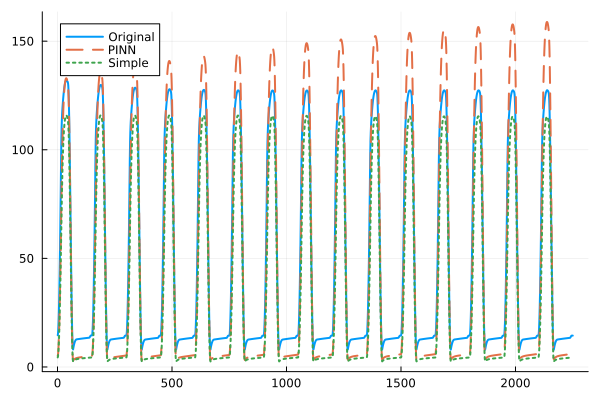

In [157]:
plot_differences(1)
# SIN1 jak na razie najlepsze i to mimo okresu 0.8 i hiperparametru 0.1
# przedzial treningowy (5.0, 9.0)

In [97]:
function plot_diff_layout()
    layout = @layout [a b c; d e f; g e f]

    plot(
        plot_differences(1),
        plot_differences(2),
        plot_differences(3),
        plot_differences(4),
        plot_differences(5),
        plot_differences(6),
        plot_differences(7),
        layout = layout,
        size = (1000, 800)
    )
end

plot_diff_layout (generic function with 1 method)

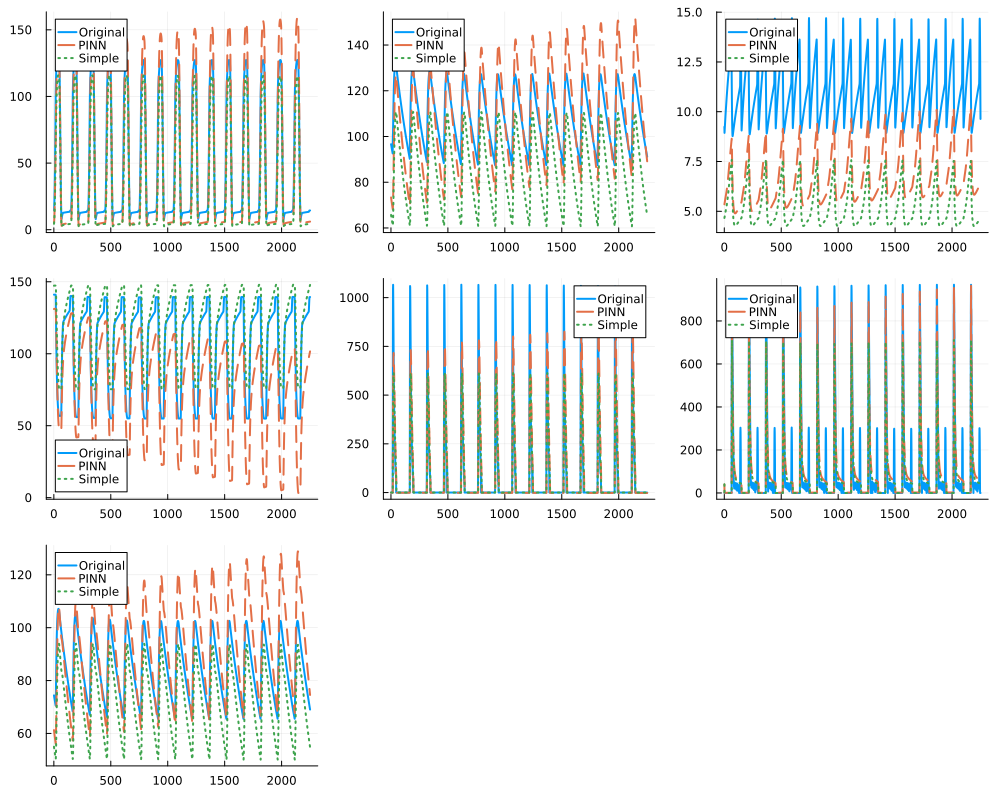

In [153]:
plot_diff_layout()